### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read the dataset

In [2]:
df = pd.read_csv("heart.csv")

### Exploring Data

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
df.shape

(303, 14)

## Identifying outliers

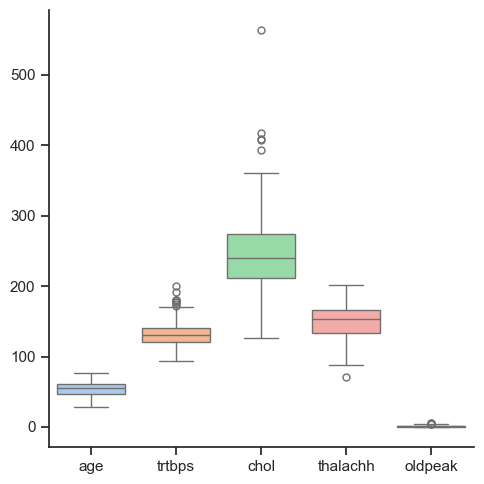

In [9]:
sns.set_theme(style="ticks", palette="pastel")
col = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
ax = sns.catplot(data=df[col], kind="box")
plt.show()

The image shows that the variables 'trtbps', 'chol', 'thalachh' and 'oldpeak' contain outliers in their data values.

### Handling outliers

In [10]:
cols_to_clean = ["trtbps", "chol", "thalachh", "oldpeak"]

for col in cols_to_clean:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    outlier_values = df[col][(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    df.loc[df[col].isin(outlier_values), col] = np.nan

### Removing outliers

In [13]:
df_cleaned = df.dropna()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       284 non-null    int64  
 1   sex       284 non-null    int64  
 2   cp        284 non-null    int64  
 3   trtbps    284 non-null    float64
 4   chol      284 non-null    float64
 5   fbs       284 non-null    int64  
 6   restecg   284 non-null    int64  
 7   thalachh  284 non-null    float64
 8   exng      284 non-null    int64  
 9   oldpeak   284 non-null    float64
 10  slp       284 non-null    int64  
 11  caa       284 non-null    int64  
 12  thall     284 non-null    int64  
 13  output    284 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 33.3 KB


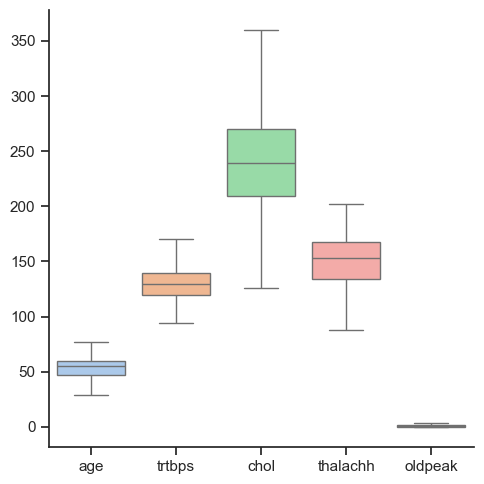

In [14]:
sns.set_theme(style="ticks", palette="pastel")
col = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
ax = sns.catplot(data=df_cleaned[col], kind="box")
plt.show()

As a result, all emissions have been effectively removed and this will not affect the analysis results

### EDA

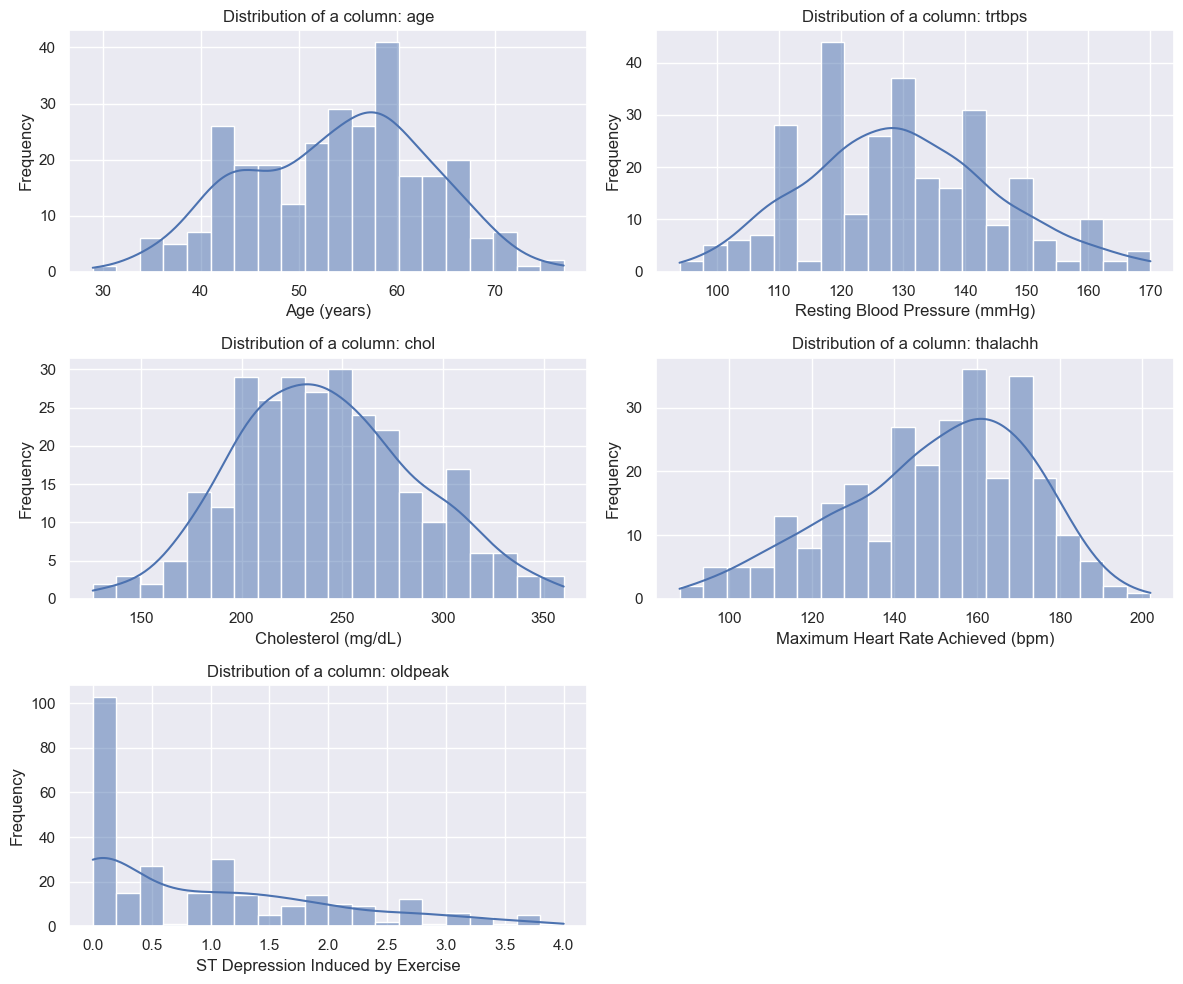

In [16]:
sns.set_theme()

num_columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
labels = ['Age (years)', 'Resting Blood Pressure (mmHg)', 'Cholesterol (mg/dL)', 
          'Maximum Heart Rate Achieved (bpm)', 'ST Depression Induced by Exercise']


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

axes = axes.flatten()

for i, (column, label) in enumerate(zip(num_columns, labels)):
    sns.histplot(df_cleaned[column], kde=True, ax=axes[i], bins=20)
    axes[i].set_xlabel(label)  
    axes[i].set_ylabel('Frequency')  
    axes[i].set_title(f'Distribution of a column: {column}') 

axes[-1].axis('off')

plt.tight_layout()
plt.show()

In general, these visualisations provide insight into the distribution and potential outliers for continuous variables in the dataset. The distributions of age, cholesterol, and maximum heart rate appear to be approximately normal or slightly skewed, while blood pressure and ST depression show more pronounced skewness.

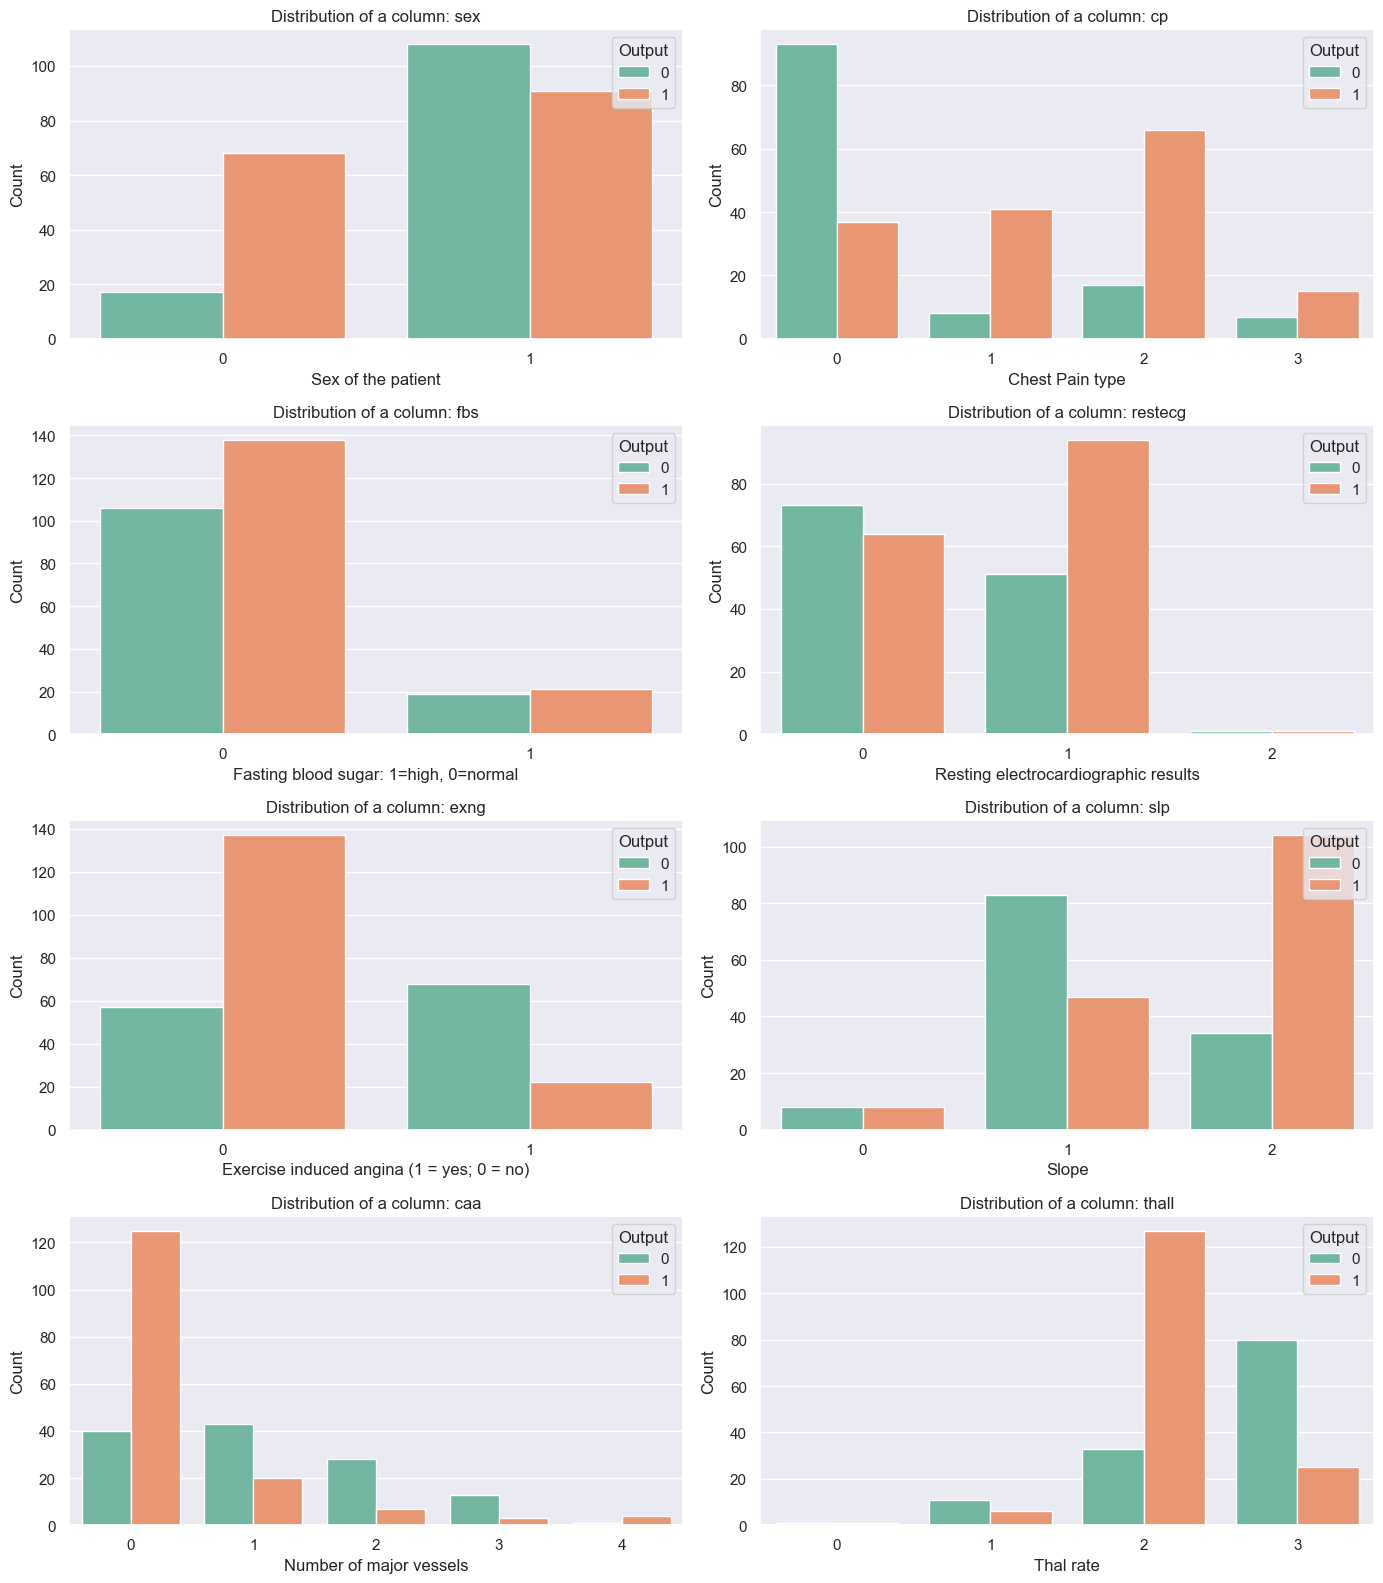

In [17]:
categ_columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
labels = ['Sex of the patient', 'Chest Pain type', 'Fasting blood sugar: 1=high, 0=normal', 
          'Resting electrocardiographic results', 'Exercise induced angina (1 = yes; 0 = no)',
          'Slope', 'Number of major vessels', 'Thal rate']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))

axes = axes.flatten()

for i, (column, label) in enumerate(zip(categ_columns, labels)):
    sns.countplot(data=df_cleaned, x=column, hue='output', ax=axes[i], palette='Set2')
    axes[i].set_xlabel(label)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Output', loc='upper right')
    axes[i].set_title(f'Distribution of a column: {column}')

plt.tight_layout()
plt.show()

Several conclusions can be drawn from the above graphs:

Type of chest pain (cp): There is a moderate positive correlation between the type of chest pain and the likelihood of having a heart attack. This suggests that people without chest pain (type 0) are least likely to have a heart attack.

Exercise-induced angina (exng): There appears to be a moderate negative correlation between exercise-induced angina and the likelihood of heart disease. This indicates that the absence of exercise-induced angina may be associated with a higher risk of heart attack.

The number of great vessels (caa): The number of major vessels stained with fluoroscopy (caa) shows a strong negative correlation with the likelihood of a heart attack. This means that a higher number of major vessels stained on fluoroscopy may indicate a healthier cardiovascular system.

Thall index (thall): There is a moderate negative correlation between the level of thalassaemia and the likelihood of a heart attack. This suggests that lower levels of thalassaemia may be associated with a higher likelihood of heart disease.

### Visualization of Correlation between different variables

Text(0.5, 1.0, 'Correlation Heatmap')

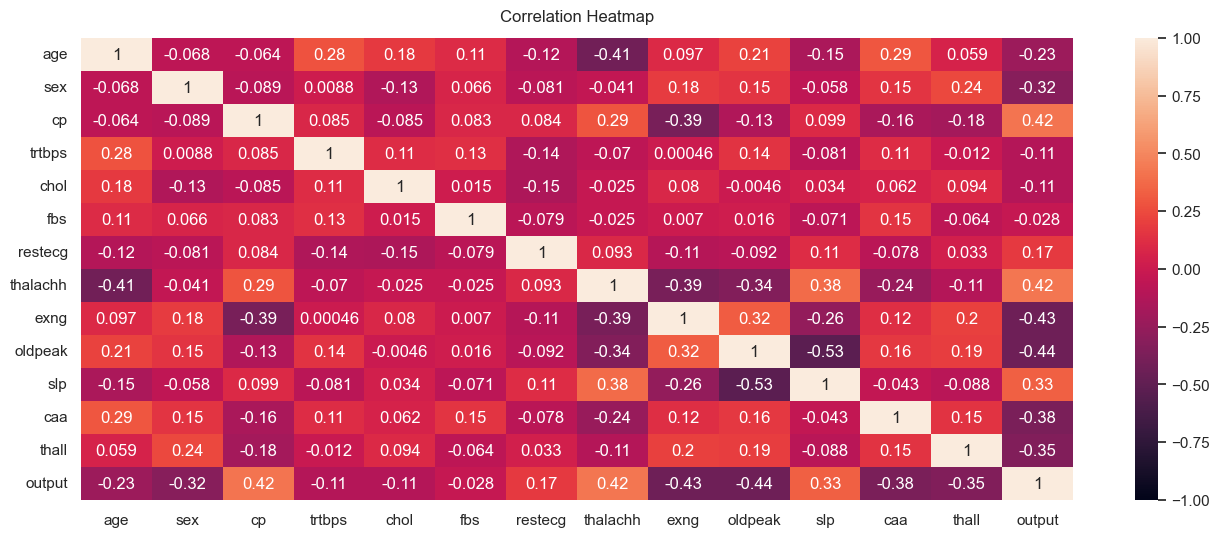

In [20]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(df_cleaned.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Variables such as cp (type of chest pain), thalachh (maximum heart rate), restecg (resting electrocardiogram results), slp (slope) and output have a positive correlation.

A positive correlation means that as the value of a predictor variable increases, the probability of a heart attack (output = 1) also tends to increase.

For example, the positive correlation between cp and outcome (0.418) indicates that individuals with more severe types of chest pain (higher cp values) have a higher risk of heart attack.

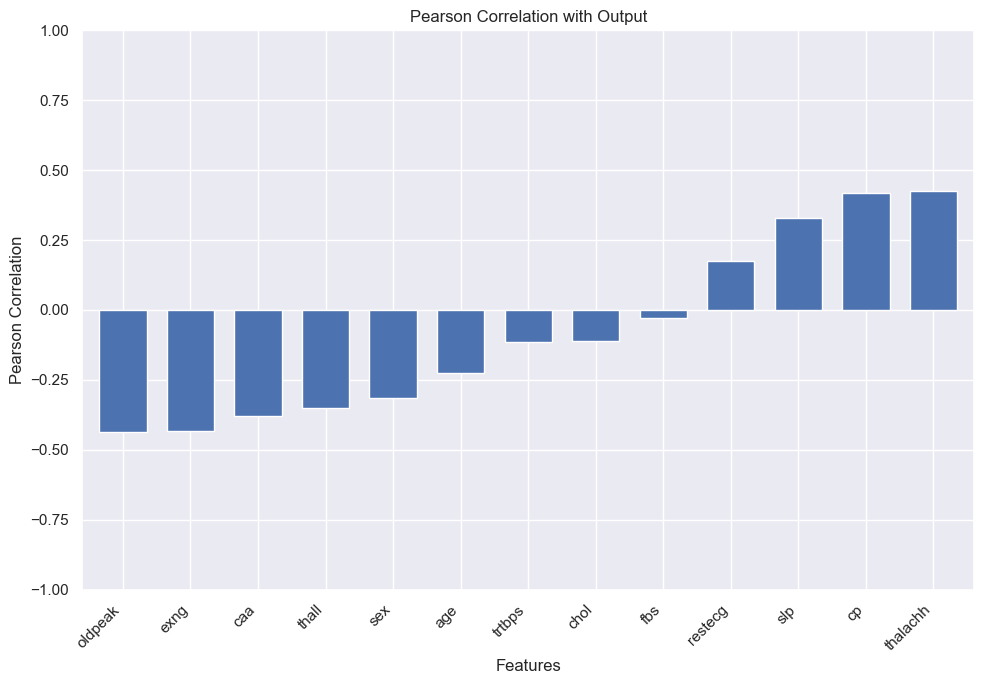

In [40]:
correlations = df_cleaned.corr(numeric_only=True)['output'][:-1].sort_values()

#Plotting
plt.figure(figsize=(10, 7))
ax = correlations.plot(kind='bar', width=0.7)
ax.set(ylim=[-1, 1], ylabel='Pearson Correlation', xlabel='Features', 
       title='Pearson Correlation with Output')
ax.set_xticklabels(correlations.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Hypothezis testing

To understand whether there is a relationship between gender and the risk of heart attack, we will conduct an A/B test. To do this, we will use a non-parametric method.

In [38]:
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm
# Subset the data for females
females = df_cleaned[df_cleaned['sex'] == 0]
males = df_cleaned[df_cleaned['sex'] == 1]

female_output = sum(females['output'])
male_output = sum(males['output'])

female_count = len(females)
male_count = len(males)

test_stat, pval = proportions_ztest(count=[female_output, male_output],
                  nobs=[female_count, male_count],
                  alternative='two-sided')

print('Two sided z-test: z = {:.4f}, p value = {:.10f}'.format(test_stat, pval))

Two sided z-test: z = 5.3281, p value = 0.0000000992


The results indicate that we can reject the null hypothesis of equal proportions between men and women in terms of the likelihood of having a heart attack.

### Modeling

Because the outcome variable in our heart attack dataset is binary, using logistic regression is a good choice. It provides coefficients that represent log odds of the outcome that can be easily communicated and understood, and they can be converted to odds ratios to illustrate the effect of variables on the probability of a heart attack.

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [42]:
df = df_cleaned.copy()

# Convert the output column to a categorical data type
df['output'] = df['output'].astype('category')
df['output'] = df['output'].cat.rename_categories(['LessLikely', 'MoreLikely'])

# Split the data into train and test sets
X = df.drop('output', axis=1)
y = df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1353, stratify=y)

In [43]:
# Train a logistic regression model with cross-validation
logistic_model = LogisticRegression(solver='liblinear')
cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=10, scoring='roc_auc')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

# Fit the model on the entire training set
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]
y_pred_classes = ['MoreLikely' if prob >= 0.5 else 'LessLikely' for prob in y_pred_proba]

Cross-validation scores: [0.73846154 0.8        0.92307692 0.93846154 0.79230769 0.96923077
 0.94615385 0.98333333 1.         0.86666667]
Mean cross-validation score: 0.8957692307692309


In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Make predictions on the test set
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]
y_pred_classes = ['MoreLikely' if prob >= 0.5 else 'LessLikely' for prob in y_pred_proba]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes, labels=['LessLikely','MoreLikely'])
print("Confusion Matrix:")
print(conf_matrix)

# Extract values from confusion matrix
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

# Calculate Sensitivity, Specificity, and Accuracy
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = accuracy_score(y_test, y_pred_classes)

print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Confusion Matrix:
[[15 10]
 [ 1 31]]
Sensitivity (Recall): 0.9688
Specificity: 0.6000
Accuracy: 0.8070


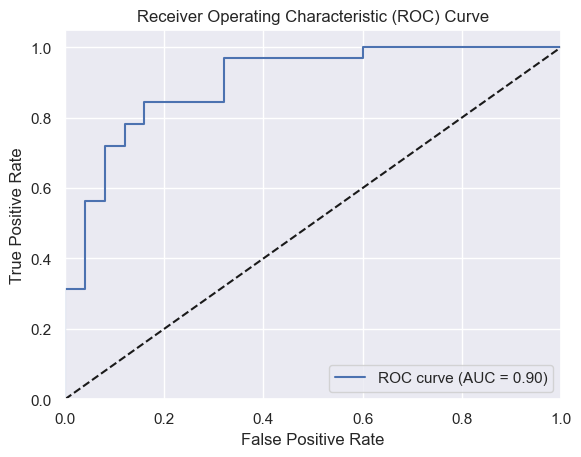

In [46]:
y_test_binary = y_test.map({'LessLikely': 0, 'MoreLikely': 1})

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_proba, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


The AUC value of 0.93 is very high, indicating that the model has an excellent ability to distinguish between patients with a higher and lower probability of a heart attack.

Most Kaggle laptops have an average AUC for logistic regression of 0.85.  However, removing outliers beforehand allowed me to improve this figure.